# **TRABALHO T2**

Estudo Introdutório a Recomendações e ao Algoritmo K-Nearest Neighbors
Este notebook apresenta um estudo referente à metodologias de recomendação de filmes a um determinado usuário, seguindo diferentes heurísticas para tal.
O dataset utilizado para este estudo pode ser encontrado no seguinte link do site GroupLens: https://grouplens.org/datasets/movielens/latest/.

***UTILIZE O MAIOR DATASET DISPONÍVEL NESTE LINK PARA FAZER O TRABALHO!***

In [1]:
# Importando bibliotecas necessárias para o estudo
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [2]:
# Lendo o dataset relacionado aos filmes
movies = pd.read_csv('../data/movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
86532,288967,State of Siege: Temple Attack (2021),Action|Drama
86533,288971,Ouija Japan (2021),Action|Horror
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller


In [3]:
# Transformando coluna movieID em índice
movies.set_index('movieId', inplace = True)
movies

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
288967,State of Siege: Temple Attack (2021),Action|Drama
288971,Ouija Japan (2021),Action|Horror
288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary


Conhecendo o Dataframe
O Dataframe 'movies' possui informações a respeito dos filmes analisados, sendo estas:

**MovieId**: Identificação única de cada filme.

**title**: O título de cada filme, junto com o ano de lançamento.

**genres**: O gênero, ou conjunto de gêneros, de cada filme.


In [4]:
# Lendo o dataset relacionado às avaliações dos usuários
ratings = pd.read_csv('../data/ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
...,...,...,...,...
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765


In [5]:
# Transformando coluna userId em índice
ratings.set_index('userId', inplace = True)
ratings

,movieId,rating,timestamp
userId,,,
1,1,4.0,1225734739
1,110,4.0,1225865086
1,158,4.0,1225733503
1,260,4.5,1225735204
1,356,5.0,1225735119
...,...,...,...
330975,8340,2.0,1091583256
330975,8493,2.5,1091585709
330975,8622,4.0,1091581777


Conhecendo o segundo dataframe
O Dataframe 'ratings' possui informações a respeito das análises feitas pelos usuários, sendo estas:

**userId**: Identificação única de cada usuário presente no dataframe.

**movieId**: Identificação única de cada filme presente no dataframe 'movies', visto anteriormente.

**rating**: A avaliação feita por aquele usuário àquele filme específico.

**timestamp**: De acordo com o site MovieLens (https://files.grouplens.org/datasets/movielens/ml-10m-README.html), representam os segundos que se passaram desde a meia-noite(UTC) do dia 1º de Janeiro de 1970

In [6]:
# Informações a respeito das avaliações informadas pelos usuários
ratings.rating.describe().round(2)

count    33832162.00
mean            3.54
std             1.06
min             0.50
25%             3.00
50%             4.00
75%             4.00
max             5.00
Name: rating, dtype: float64

In [7]:
# Número de usuários contidos dentro do dataset
ratings.index.nunique()

330975

## **1. Primeira Tentativa de Recomendação**

Sem ter qualquer tipo de informação prévia a respeito do usuário e seus gostos, podemos recomendá-lo dez filmes de acordo com duas diferentes métricas:

1º - Os dez filmes mais avaliados.

2º - Os dez filmes mais bem avaliados.

In [8]:
# Vamos avaliar as informações das notas de acordo com os filmes
# Utilizando o método value_counts(), podemos identificar os filmes que mais receberam avaliações
ratings['movieId'].value_counts()

movieId
318       122296
356       113581
296       108756
2571      107056
593       101802
           ...  
212773         1
194901         1
194572         1
194002         1
193301         1
Name: count, Length: 83239, dtype: int64

In [9]:
# O filme mais avaliado do dataset é o 318. Buscamos no índice por esse movieId
movies.loc[[318]]

,title,genres
movieId,,
318,"Shawshank Redemption, The (1994)",Crime|Drama


In [10]:
# Criando coluna que contabiliza o número de avaliações
movies['number_of_ratings'] = ratings['movieId'].value_counts()

# Criando coluna que calcula a nota média de avaliações e definindo duas casas decimais de
# arredondamento.
movies['average_ratings'] = ratings.groupby('movieId').rating.mean().round(2)

# Visualizando o Dataframe
movies

,title,genres,number_of_ratings,average_ratings
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,76813.0,3.89
2,Jumanji (1995),Adventure|Children|Fantasy,30209.0,3.28
3,Grumpier Old Men (1995),Comedy|Romance,15820.0,3.17
4,Waiting to Exhale (1995),Comedy|Drama|Romance,3028.0,2.87
5,Father of the Bride Part II (1995),Comedy,15801.0,3.08
...,...,...,...,...
288967,State of Siege: Temple Attack (2021),Action|Drama,1.0,3.50
288971,Ouija Japan (2021),Action|Horror,1.0,0.50
288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,1.0,4.00


# **1.1. Recomendando os dez filmes mais avaliados**

In [11]:
# Para visualizarmos os dez filmes mais avaliados, basta utilizarmo o método sort_values()
# e ordenarmos o dataframe pela coluna 'number_of_ratings' de forma decrescente.
movies.sort_values('number_of_ratings', ascending = False).head(10)

,title,genres,number_of_ratings,average_ratings
movieId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,122296.0,4.42
356,Forrest Gump (1994),Comedy|Drama|Romance|War,113581.0,4.07
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,108756.0,4.19
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,107056.0,4.16
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,101802.0,4.15
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,97202.0,4.09
2959,Fight Club (1999),Action|Crime|Drama|Thriller,86207.0,4.24
527,Schindler's List (1993),Drama|War,84232.0,4.24
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,83026.0,3.69


Utilizando como base o número total de avaliações, os dez primeiros filmes que podemos indicar a um novo usuário são os listados acima!

## **1.2. Recomendando os dez filmes mais bem avaliados**

In [12]:
# Para visualizar os dez filmes mais bem avaliados, basta usar o mesmo método sort_values()
# para ordenar a coluna 'average_ratings' de forma decrescente.
# Entretanto, é necessário filtrar a coluna 'number_of_ratings', definindo um número mínimo
# de avaliações que um filme deva ter para aparecer no Dataframe, evitando que filmes de nicho,
# pouco avaliados, apareçam como mais bem votados.

# Definimos um número mínimo de avaliações de 1000
movies.query('number_of_ratings >= 1000').sort_values('average_ratings', ascending = False).head(10)

,title,genres,number_of_ratings,average_ratings
movieId,,,,
171011,Planet Earth II (2016),Documentary,2041.0,4.45
159817,Planet Earth (2006),Documentary,3015.0,4.45
318,"Shawshank Redemption, The (1994)",Crime|Drama,122296.0,4.42
170705,Band of Brothers (2001),Action|Drama|War,2835.0,4.42
858,"Godfather, The (1972)",Crime|Drama,75004.0,4.33
202439,Parasite (2019),Comedy|Drama,12399.0,4.33
179135,Blue Planet II (2017),Documentary,1267.0,4.31
198185,Twin Peaks (1989),Drama|Mystery,1132.0,4.30
1203,12 Angry Men (1957),Drama,22730.0,4.27


## **2. Recomendação pela Similaridade de Gênero**

Presumindo que sabemos que o usuário já assitiu alguns filmes e que os IDs destes filmes são 1,21,19,10,11,7 e 2, podemos utilizar esta informação para indicar a ele novos filmes de gêneros similares àqueles que ele assistiu, sem levar em conta, entretanto, suas avaliações a respeito destes filmes!

In [13]:
# Criando uma lista de filmes assistidos
watched_movies = [1,21,19,10,11,7,2]
# Visualizando quais filmes são estes
movies.loc[watched_movies]

,title,genres,number_of_ratings,average_ratings
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,76813.0,3.89
21,Get Shorty (1995),Comedy|Crime|Thriller,26183.0,3.57
19,Ace Ventura: When Nature Calls (1995),Comedy,26642.0,2.67
10,GoldenEye (1995),Action|Adventure|Thriller,34942.0,3.43
11,"American President, The (1995)",Comedy|Drama|Romance,20256.0,3.66
7,Sabrina (1995),Comedy|Romance,15596.0,3.37
2,Jumanji (1995),Adventure|Children|Fantasy,30209.0,3.28


**Filmes de Gênero Similares**

Observando que o último filme assistido, Jumanji, encontra-se na categoria Adventure|Children|Fantasy, buscamos filmes de categorias similares e recomendamos ao usuário estes filmes ordenando-os de acordo com a média de avaliações, também filtrando o número de avaliações, evitando recomendar filmes pouco avaliados.

In [14]:
# Buscamos filmes que tenham, no minimo, 100 avaliações dentro da categoria.
# Método drop() utilizado para evitar que o usuário receba recomendações de filmes já assistidos.
movies.query("genres == 'Adventure|Children|Fantasy'").query('number_of_ratings >= 100').sort_values(
'average_ratings', ascending = False).drop(watched_movies, errors = 'ignore').head(10)

,title,genres,number_of_ratings,average_ratings
movieId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,36127.0,3.70
80748,Alice in Wonderland (1933),Adventure|Children|Fantasy,125.0,3.52
2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,13617.0,3.52
50601,Bridge to Terabithia (2007),Adventure|Children|Fantasy,2697.0,3.44
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,17042.0,3.39
2043,Darby O'Gill and the Little People (1959),Adventure|Children|Fantasy,1217.0,3.28
82169,Chronicles of Narnia: The Voyage of the Dawn T...,Adventure|Children|Fantasy,2968.0,3.28
59501,"Chronicles of Narnia: Prince Caspian, The (2008)",Adventure|Children|Fantasy,4646.0,3.19
160573,Pete's Dragon (2016),Adventure|Children|Fantasy,458.0,3.16


# **3. Recomendações por Similaridades Entre Usuários**

**Calculando a distância euclidiana**

Outra abordagem que podemos utilizar é a recomendação através da similaridade entre usuários.
Sabendo que João, Maria e Joana assistiram, cada um, os mesmos dois filmes (x e y) e os avaliaram, podemos realizar o cálculo da distância euclidiana entre estes três usuários por meio do teorema de Pitágoras para identificarmos a similaridade entre seus gostos.

Text(0.5, 1.0, 'Calculando a distância entre dois usuários')

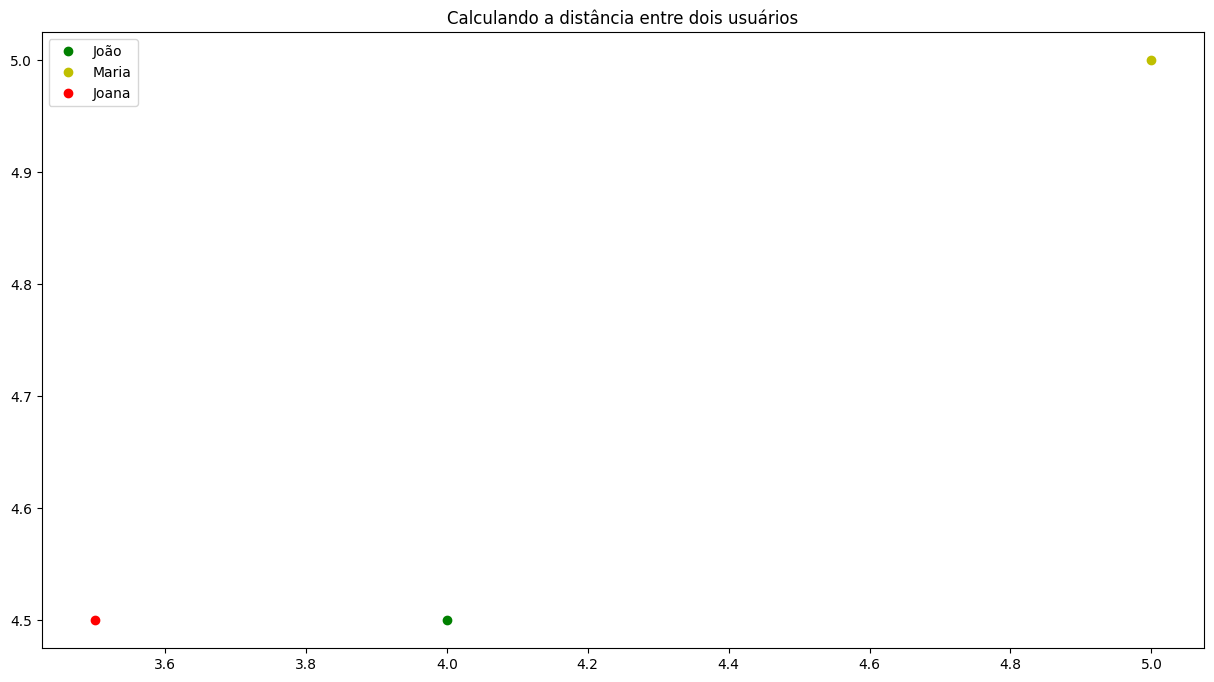

In [15]:
# Vamos supor que João, Maria e Joana fizeram as seguintes avaliações dos mesmos filmes
joao = np.array([4,4.5])
maria = np.array([5,5])
joana = np.array([3.5,4.5])

# Podemos plotar em um gráfico para visualizarmos as diferentes avaliações por cada um deles
plt.figure(figsize=(15,8))
plt.plot(4, 4.5,"go") # Avaliações de João representadas por um círculo verde
plt.plot(5, 5,"yo") # Avaliações de Maria representadas por um círculo amarelo
plt.plot(3.5,4.5,"ro") # Avaliações de Joana representadas por um círculo vermelho
plt.legend(['João','Maria','Joana'])
plt.title("Calculando a distância entre dois usuários")

Sabendo as avaliações de cada um dos três usuários, podemos utilizar o método linalg.norm() do Numpy para calcularmos as distâncias euclidianas entre eles.

In [16]:
# Criando função que faça o cálculo da distância euclidiana
def distance(a,b):
    return round(np.linalg.norm(a - b), 2) # método round para exibir apenas 2 números decimais

In [17]:
# Medindo as distâncias entre João, Maria e Joana
print(f'A distância de João e Maria é de {distance(joao,maria)}')
print(f'A distância de João e Joana é de {distance(joao,joana)}')

A distância de João e Maria é de 1.12
A distância de João e Joana é de 0.5


Através do cálculo da distância euclidiana entre João, Maria e Joana, podemos perceber que Joana está muito mais próxima de João do que de Maria, ou seja, João e Maria possuem gostos similares, de acordo com suas avaliações dos mesmos filmes.
Sabendo de tal similaridade, faz sentido recomendar à Joana os filmes que João assistiu e gostou.

**3.1. Aplicando o Cálculo de Distância Euclidiana em Dois Usuários do Dataset**

Vamos supor que queremos recomendar filmes ao userId 1 e vamos calcular qual é a sua distância do userId 4.

In [18]:
# Definindo função para extrair informaçoes a respeito das avaliações de cada usuário
def user_ratings(userId):
    user_ratings = ratings.query('userId == %d' % userId)[['movieId','rating']].set_index('movieId')
    return user_ratings

In [19]:
# Testando a função e extraindo o movieId e a avaliação do userId 1 de cada filme indexado
user_ratings(1)

,rating
movieId,
1,4.0
110,4.0
158,4.0
260,4.5
356,5.0
...,...
40629,4.5
49647,5.0
52458,5.0


In [20]:
# Extraindo as avaliações do userId 4
user_ratings(4)

,rating
movieId,
260,5.0
318,5.0
356,5.0
595,4.5
858,3.0
915,4.0
1097,3.5
2324,5.0
2858,4.0


In [21]:
# Definindo uma função que extraia as avaliações de dois userIds informados, junte-os em um mesmo
# dataframe e calcule a distância euclidiana entre eles

def euclidean_distance(userId1,userId2):
    userId1_ratings = user_ratings(userId1)
    userId2_ratings = user_ratings(userId2)
    join_df = userId1_ratings.join(userId2_ratings, lsuffix = '_user1',
                                  rsuffix = '_user2').dropna()
    distance_users = distance(join_df.rating_user1,join_df.rating_user2)
    return print(f'A distância entre o usuário {userId1} e {userId2} é {distance_users}')

In [22]:
# Calculando a distância entre o userId 1 e userId 4
euclidean_distance(1,4)

A distância entre o usuário 1 e 4 é 1.32


# **4. Algoritmo K-Nearest Neighbors**

O K-nearest neighbors, podendo ser chamado também de 'K-vizinhos mais próximos' é um algoritmo de machine learning muito usado para realizar classificações.
Supondo que tenhamos o seguinte conjunto de dados, dividido em duas classes: azul e vermelho, e temos um dado específico que não está classificado, identificado pela cor verde na imagem abaixo:
knn.jpg
O algoritmo KNN é utilizado para calcular as distâncias entre este dado não-categorizado com os K-vizinhos mais próximos, ou seja, os vizinhos cuja distância sejam menores.
No caso da imagem acima, se informarmos o parâmetro K = 3, o algoritmo irá calcular a distância entre o dado não-categorizado com os três dados categorizados mais próximos e, neste caso, irá categorizar o dado verde como sendo pertencente à classe vermelha.

<img src="../images/KNN2.png">

O algoritmo KNN é utilizado para calcular as distâncias entre este dado não-categorizado com os K-vizinhos mais próximos, ou seja, os vizinhos cuja distância sejam menores.
No caso da imagem acima, se informarmos o parâmetro K = 3, o algoritmo irá calcular a distância entre o dado não-categorizado com os três dados categorizados mais próximos e, neste caso, irá categorizar o dado verde como sendo pertencente à classe vermelha.

**(Insira aqui a imagem knn.jpg)**

<img src="../images/image.png">

A distância euclidiana é uma das mais usadas no algoritmo KNN para calcular a distância entre dados de um conjunto e, utilizando as funções anteriores criadas neste estudo, podemos definir novas funções, construindo um algoritmo KNN do zero, para identificar usuários com gostos similares em nosso dataset e recomendar filmes se baseando no grau de proximidade entre eles.

In [23]:
# Refinando a função euclidean_distance() para filtrar usuários que sejam muito distantes, ou
# usuários que não tenham nenhum filme em comum avaliados.
# 'minimum' se refere a quantidade mínima de filmes avaliados entre usuários diferentes
def euclidean_distance(userId1,userId2, minimum = 5):
    userId1_ratings = user_ratings(userId1)
    userId2_ratings = user_ratings(userId2)
    join_df = userId1_ratings.join(userId2_ratings, lsuffix = '_user1',
                                  rsuffix = '_user2').dropna()

    if(len(join_df) < minimum):
        return None

    distance_users = distance(join_df.rating_user1,join_df.rating_user2)
    return [userId1, userId2, distance_users]

In [24]:
# Definindo função que faça o cálculo da distância de diversos usuários
# Considerando que há um número muito alto de usuários, o parâmetro users_to_verify pode ser
# usado para definir o número de usuários que serão verificados para calcular a distância dentro
# do dataframe.
# ex: se users_to_verify = 50, apenas os 50 primeiros usuários do dataframe serão verificados
def distance_from_all(informed_user, users_to_verify = None):
    all_users = ratings.index.unique()
    if users_to_verify:
        all_users = all_users[:users_to_verify]
    distance_all_users = [euclidean_distance(informed_user,userId) for userId in all_users]
    distance_all_users = list(filter(None, distance_all_users))
    distance_all_users = pd.DataFrame(distance_all_users, columns = ['informed_user','others','distance'])
    return distance_all_users

In [25]:
# Definindo função que calcule a distância dos K-vizinhos mais próximos
# k_nearest_neighbors é o parâmetro que deve ser dado para informar quais vizinhos mais próximos
# serão analizados. Por padrão, o algoritmo irá verificar apenas os 10 vizinhos mais próxmos, ou
# seja, os 10 usuários mais similares ao usuário informado
def knn(informed_user, k_nearest_neighbors = 10, users_to_verify = None):
    distance_users = distance_from_all(informed_user, users_to_verify = users_to_verify)
    distance_users = distance_users.sort_values('distance')
    distance_users = distance_users.set_index('others').drop(informed_user, errors = 'ignore')
    return distance_users.head(k_nearest_neighbors)

In [26]:
# Definindo função de sugestões
def suggestions_for_user(informed_user, k_nearest_neighbors = 10, users_to_verify = None):
    informed_user_ratings = user_ratings(informed_user)
    movies_seen_by_informed_user = informed_user_ratings.index

    similar = knn(informed_user, k_nearest_neighbors=k_nearest_neighbors,users_to_verify=users_to_verify)
    similar_users = similar.index
    similar_users_ratings = ratings.loc[similar_users]
    recommendations = round(similar_users_ratings.groupby('movieId').mean()[['rating']], 2)
    fequency = similar_users_ratings.groupby('movieId').count()[['rating']]

   #minimum_filter cria um filtro para mostrar apenas títulos que tenham sido avaliados por,
   # no mínimo, a metade dos k-vizinhos mais próximos
    minimum_filter = k_nearest_neighbors / 2
    recommendations = recommendations.join(fequency, lsuffix = '_mean_others',rsuffix='_frequency_others')
    recommendations = recommendations.query('rating_frequency_others >= %.2f' % minimum_filter)
    recommendations = recommendations.sort_values('rating_mean_others', ascending = False)
    recommendations = recommendations.drop(movies_seen_by_informed_user, errors = 'ignore')
    return recommendations.join(movies)

In [27]:
# Testando as recomendações para o usuário 1, analizando os primeiros 500 usuários do dataframe
# Por definição, os k-vizinhos mais próximos dos 500 primeiros usuários são os 10 usuários
# mais próximos cujas avaliações serão relevantes para a recomendação.
#head(10) exibe os dez filmes ordenados pela avaliação média dos K-Vizinhos mais próximos.
suggestions_for_user(1,users_to_verify=500).head(10)

,rating_mean_others,rating_frequency_others,title,genres,number_of_ratings,average_ratings
movieId,,,,,,
318,4.3,5,"Shawshank Redemption, The (1994)",Crime|Drama,122296.0,4.42
858,4.3,5,"Godfather, The (1972)",Crime|Drama,75004.0,4.33
2858,4.0,5,American Beauty (1999),Drama|Romance,69902.0,4.10


# **OBSERVAÇÃO**

A função suggestion_for_user recebe como parâmetro o userId do usuário que desejamos recomendar os filmes, os k-vizinhos mais próximos - k_nearest_neighbors(10 por padrão) e a quantidade de usuários para terem suas distâncias calculadas dentro do dataset -users_to_verify(por padrão, todo o dataset é incluído).
O dataframe de recomendações recebeu duas novas colunas, sendo elas a rating_mean_others, que representa a média de avaliações dos k-vizinhos mais próximos, e rating_frequency_others, que mostra quantos usuários, dentre os k-vizinhos, avaliaram aquele filme.
O dataframe também é organizado pela média das avaliações dos k-vizinhos, em ordem decrescente, e a frequência mínima estabelecida para que o filme seja recomendado é de 5, ou seja, ele deve ter sido avaliado por ao menos metade dos k-vizinhos selecionados.
Neste contexto, calculando as distâncias de 500 usuários, encontrando os mais similares ao userID 1 de acordo com suas próprias avaliações, os dez filmes não vistos pelos userId 1 que podemos recomendar a ele são os listados na célula anerior.

## 🧮 3. Número médio de gêneros por filme
Calcular a média de gêneros atribuídos a cada filme.

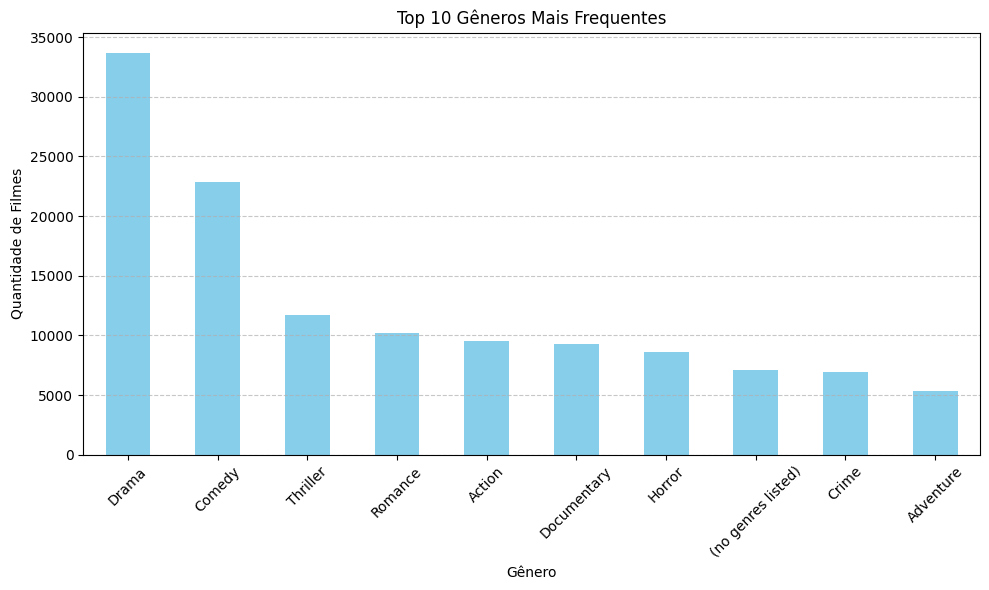

In [28]:
movies['genres_list'] = movies['genres'].str.split('|')
all_genres = movies['genres_list'].explode()

genre_counts = all_genres.value_counts()
top_10_genres = genre_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Gêneros Mais Frequentes')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Filmes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

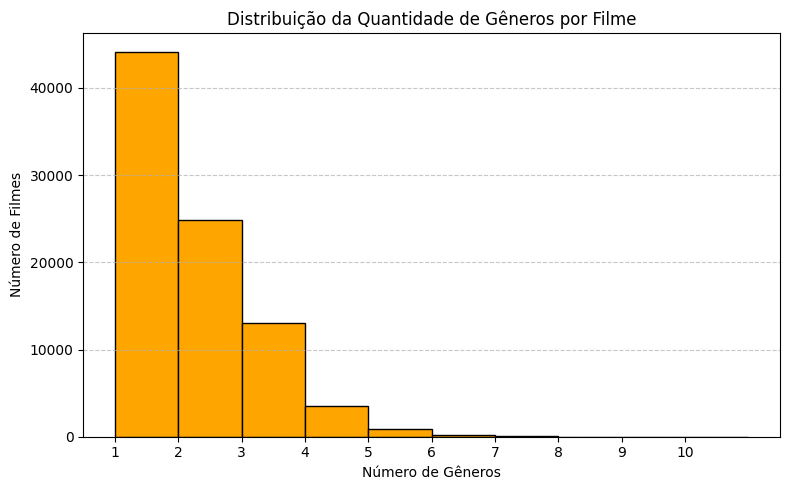

In [29]:
genre_per_movie = movies['genres_list'].apply(len)

plt.figure(figsize=(8, 5))
plt.hist(genre_per_movie, bins=range(1, genre_per_movie.max() + 2), color='orange', edgecolor='black')
plt.title('Distribuição da Quantidade de Gêneros por Filme')
plt.xlabel('Número de Gêneros')
plt.ylabel('Número de Filmes')
plt.xticks(range(1, genre_per_movie.max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

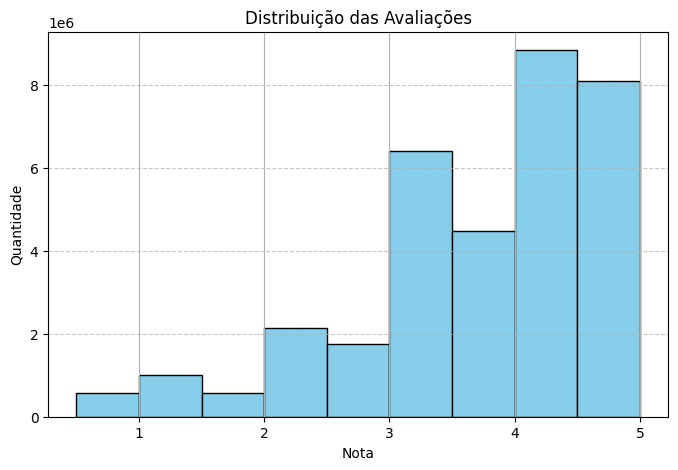

In [30]:
df = ratings.merge(movies, on='movieId')

plt.figure(figsize=(8,5))
df['rating'].hist(bins=9, edgecolor='black', color='skyblue')
plt.title('Distribuição das Avaliações')
plt.xlabel('Nota')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [31]:
movie_stats = df.groupby(['movieId', 'title']).agg(
    nota_media=('rating', 'mean'),
    num_avaliacoes=('rating', 'count')
).reset_index()

In [32]:
min_avaliacoes = 100
top_filmes = movie_stats[movie_stats['num_avaliacoes'] >= min_avaliacoes] \
    .sort_values(by='nota_media', ascending=False).head(10)

In [33]:
print("Top 10 filmes mais bem avaliados (mínimo de 100 avaliações):")
print(top_filmes[['title', 'nota_media', 'num_avaliacoes']])

Top 10 filmes mais bem avaliados (mínimo de 100 avaliações):
                                  title  nota_media  num_avaliacoes
44214            Planet Earth II (2016)    4.451739            2041
39322               Planet Earth (2006)    4.448093            3015
44066           Band of Brothers (2001)    4.423986            2835
314    Shawshank Redemption, The (1994)    4.416792          122296
44440                            Cosmos    4.343200             625
58750                   Parasite (2019)    4.329946           12399
840               Godfather, The (1972)    4.326603           75004
47999             Blue Planet II (2017)    4.312944            1267
65984           Twelve Angry Men (1954)    4.305723             332
56804                 Twin Peaks (1989)    4.302562            1132


### Top 10 Filmes Mais Populares

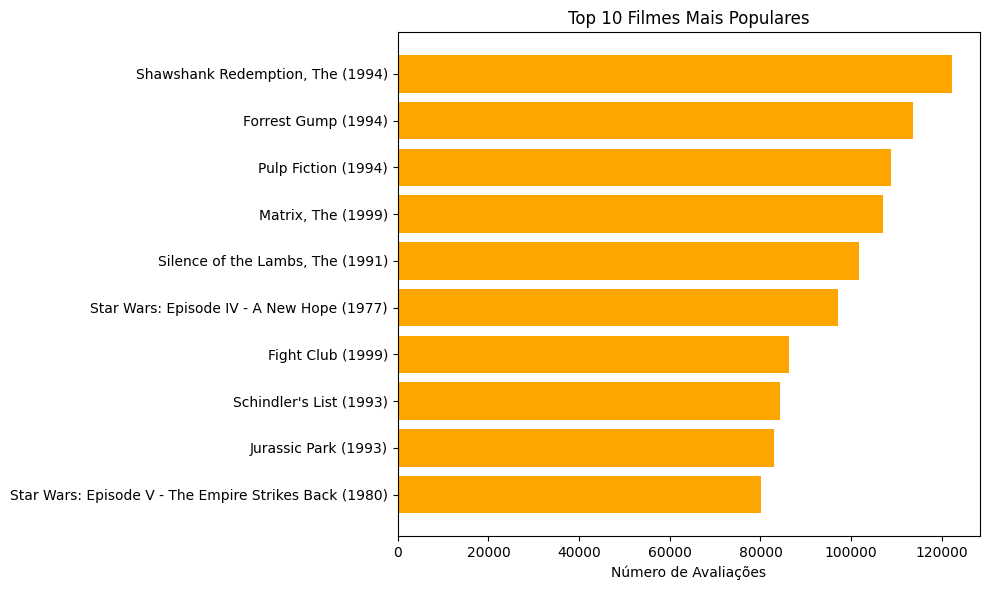

In [34]:
mais_populares = movie_stats.sort_values(by='num_avaliacoes', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(mais_populares['title'], mais_populares['num_avaliacoes'], color='orange')
plt.xlabel('Número de Avaliações')
plt.title('Top 10 Filmes Mais Populares')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()